In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
import numpy as np
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data/asd_data.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [5]:
print(f"Number of Instances: {df.shape[0]}")
print(f"Data types of features:\n{df.dtypes}")
if 'Class/ASD' in df.columns:
    print(f"Number of Classes: {df['Class/ASD'].nunique()}")
else:
  print("The dataset does not have a 'Class/ASD' column.")

Number of Instances: 1985
Data types of features:
CASE_NO_PATIENT'S                                       int64
A1                                                      int64
A2                                                      int64
A3                                                      int64
A4                                                      int64
A5                                                      int64
A6                                                      int64
A7                                                      int64
A8                                                      int64
A9                                                      int64
A10_Autism_Spectrum_Quotient                            int64
Social_Responsiveness_Scale                           float64
Age_Years                                               int64
Qchat_10_Score                                        float64
Speech Delay/Language Disorder                         object
Learning disorder   

# Handling Missing Values

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal missing values in the DataFrame:")
print(df.isnull().sum().sum())

Missing values per column:
CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depr

dataset has 63 missing values distributed across four columns:


1.   Social_Responsiveness_Scale (float64) → 9 missing values
2.   Qchat_10_Score (float64)→ 39 missing values
3. Depression (object)→ 1 missing value
4.Social/Behavioural Issues(object) → 14 missing values






Imputing Social_Responsiveness_Scale with mean

In [7]:
# Calculate the mean of the 'Social_Responsiveness_Scale' column
mean_srs = df['Social_Responsiveness_Scale'].mean()

# Impute missing values in 'Social_Responsiveness_Scale' with the mean
df['Social_Responsiveness_Scale'] = df['Social_Responsiveness_Scale'].fillna(mean_srs)
print(df['Social_Responsiveness_Scale'].isnull().sum())

0


Imputing Qchat_10_Score with mean

In [8]:
mean_qchat = df['Qchat_10_Score'].mean()
df['Qchat_10_Score'] = df['Qchat_10_Score'].fillna(mean_qchat)
print(df['Qchat_10_Score'].isnull().sum())

0


Imputing Social/Behavioural Issues with mode

In [9]:
mode_social_behavioural = df['Social/Behavioural Issues'].mode()[0]
df['Social/Behavioural Issues'] = df['Social/Behavioural Issues'].fillna(mode_social_behavioural)
print(df['Social/Behavioural Issues'].isnull().sum())

0


Imputing Depression column values with mode

In [10]:
mode_depression = df['Depression'].mode()[0]
df['Depression'] = df['Depression'].fillna(mode_depression)
print(df['Depression'].isnull().sum())

0


In [11]:
df.isnull().sum()

,0
CASE_NO_PATIENT'S,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


# Check for Duplicates

In [12]:
print(df.duplicated().sum())

0


# Drop unique column

In [13]:
df = df.drop(columns=['CASE_NO_PATIENT\'S'])

# Handling Outliers

In [14]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print (numerical_cols)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score', 'Childhood Autism Rating Scale']


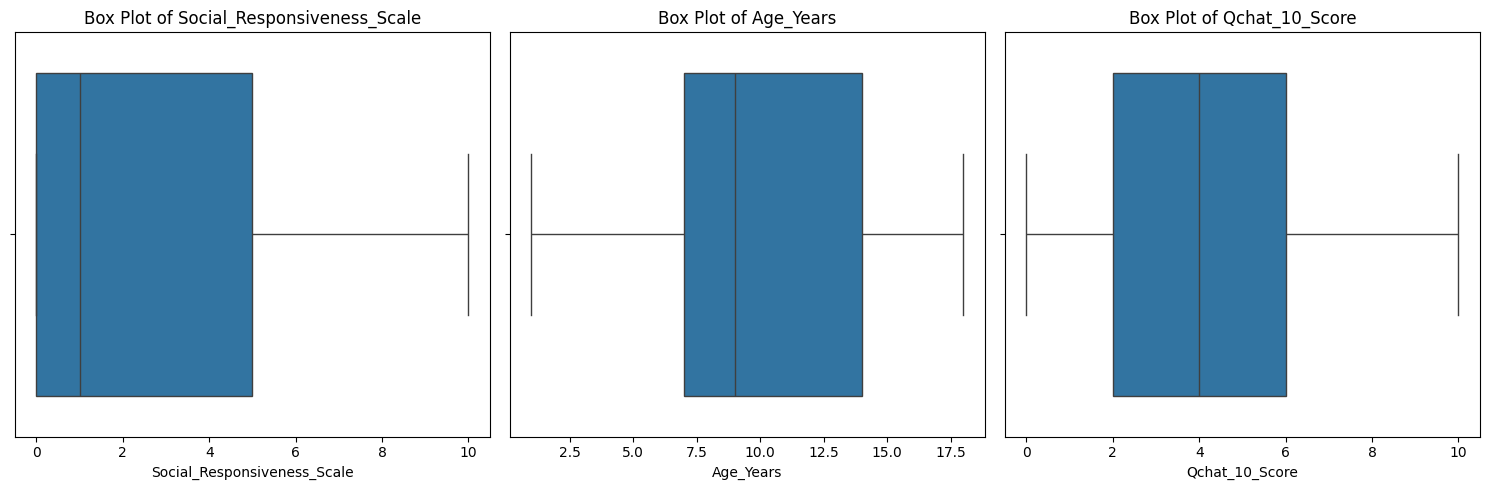

In [15]:
columns_to_plot = ['Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [16]:
def detect_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


numerical_cols = ['Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score']

for column in numerical_cols:
  outliers_df = detect_outliers_iqr(df, column)
  print(f"Outliers in column '{column}':")
  if not outliers_df.empty:
      print(outliers_df)
  else:
      print("No outliers found.")

Outliers in column 'Social_Responsiveness_Scale':
No outliers found.
Outliers in column 'Age_Years':
No outliers found.
Outliers in column 'Qchat_10_Score':
No outliers found.


# Feature Scalling

In [17]:
columns_to_scale = ['Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled data
print(df[columns_to_scale].head())

   Social_Responsiveness_Scale  Age_Years  Qchat_10_Score
0                          0.3   0.058824             0.3
1                          0.6   0.117647             0.4
2                          0.7   0.117647             0.4
3                          0.1   0.058824             1.0
4                          0.3   0.058824             0.9


# Data Encoding

In [18]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: Speech Delay/Language Disorder
Speech Delay/Language Disorder
Yes    1057
No      928
Name: count, dtype: int64
------------------------------
Column: Learning disorder
Learning disorder
Yes    1075
No      910
Name: count, dtype: int64
------------------------------
Column: Genetic_Disorders
Genetic_Disorders
Yes    1013
No      972
Name: count, dtype: int64
------------------------------
Column: Depression
Depression
Yes    1055
No      930
Name: count, dtype: int64
------------------------------
Column: Global developmental delay/intellectual disability
Global developmental delay/intellectual disability
Yes    1054
No      931
Name: count, dtype: int64
------------------------------
Column: Social/Behavioural Issues
Social/Behavioural Issues
Yes    1054
No      931
Name: count, dtype: int64
------------------------------
Column: Anxiety_disorder
Anxiety_disorder
Yes    1051
No      934
Name: count, dtype: int64
------------------------------
Column: Sex
Sex
M    1447
F     5

Binary Categorical Features (Yes/No, M/F) → Use Label Encoding (0 & 1)

In [19]:
binary_cols = [
    'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders',
    'Depression', 'Global developmental delay/intellectual disability',
    'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice',
    'Family_mem_with_ASD', 'ASD_traits', 'Sex'
]

encoder = LabelEncoder()
for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

Handling Ethnicity (Standardizing Labels Before Encoding)
The Ethnicity column contains inconsistent capitalization & similar categories:

In [20]:
df['Ethnicity'] = df['Ethnicity'].str.lower().str.strip()
df['Ethnicity'] = df['Ethnicity'].replace({
    'asian': 'Asian', 'south asian': 'South Asian', 'middle eastern': 'Middle Eastern',
    'black': 'Black', 'mixed': 'Mixed'
})

In [21]:
print(df['Ethnicity'].value_counts())

Ethnicity
Asian             605
white european    549
Middle Eastern    403
South Asian       255
Black              53
hispanic           40
others             35
latino             26
Mixed               8
pacifica            8
native indian       3
Name: count, dtype: int64


In [22]:
# Create contingency table
contingency_table = pd.crosstab(df['Ethnicity'], df['ASD_traits'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f'Chi-Square Statistic: {chi2_stat:.3f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-Value: {p_value:.5f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: There is a significant association between Ethnicity and ASD traits.")
else:
    print("Conclusion: No significant association between Ethnicity and ASD traits.")

Chi-Square Statistic: 557.019
Degrees of Freedom: 10
P-Value: 0.00000
Conclusion: There is a significant association between Ethnicity and ASD traits.


In [23]:
# Function to calculate Cramér's V
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * min(dof, contingency_table.shape[1] - 1)))

# Total number of observations
n = df.shape[0]

# Compute Cramér's V
cramers_v_value = cramers_v(chi2_stat, n, dof)

# Display result
cramers_v_value

np.float64(0.5297303255314949)

In [24]:
# Define a threshold for grouping rare categories
threshold = 50

# Replace rare categories with 'Other'
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: x if df['Ethnicity'].value_counts()[x] >= threshold else 'Other')

In [25]:
print(df['Ethnicity'].value_counts())

Ethnicity
Asian             605
white european    549
Middle Eastern    403
South Asian       255
Other             120
Black              53
Name: count, dtype: int64


In [26]:
# Initialize One-Hot Encoder with drop='first' to reduce feature space
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected argument
ethnicity_encoded = encoder.fit_transform(df[['Ethnicity']])

# Convert to DataFrame with appropriate column names
ethnicity_encoded_df = pd.DataFrame(ethnicity_encoded, columns=encoder.get_feature_names_out(['Ethnicity']))

# Merge with the original DataFrame and drop the original Ethnicity column
df = pd.concat([df, ethnicity_encoded_df], axis=1).drop(columns=['Ethnicity'])

# Display the updated DataFrame with One-Hot Encoding applied
print("One-Hot Encoded Ethnicity Data:")
print(df.head())

One-Hot Encoded Ethnicity Data:
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  ...  Sex  \
0   0   0   0   0   0   0   1   1   0                             1  ...    0   
1   1   1   0   0   0   1   1   0   0                             0  ...    1   
2   1   0   0   0   0   0   1   1   0                             1  ...    1   
3   1   1   1   1   1   1   1   1   1                             1  ...    1   
4   1   1   0   1   1   1   1   1   1                             1  ...    0   

   Jaundice  Family_mem_with_ASD  Who_completed_the_test  ASD_traits  \
0         1                    0           Family Member           0   
1         1                    0           Family Member           1   
2         1                    0           Family Member           1   
3         0                    0           Family Member           1   
4         0                    0           Family Member           1   

   Ethnicity_Black  Ethnicity_Middle Eastern  Et

Handling Who_completed_the_test (Standardizing & Encoding)
Standardizing inconsistent capitalization

In [27]:
df['Who_completed_the_test'] = df['Who_completed_the_test'].str.lower().str.strip()
df['Who_completed_the_test'] = df['Who_completed_the_test'].replace({
    'family member': 'Family Member'
})

In [28]:
print(df['Who_completed_the_test'].value_counts())

Who_completed_the_test
health care professional    1233
Family Member                716
school and ngo                29
self                           4
others                         3
Name: count, dtype: int64


In [29]:
# Define a threshold for grouping rare categories
threshold = 100

# Replace rare categories with 'Other'
df['Who_completed_the_test'] = df['Who_completed_the_test'].apply(lambda x: x if df['Who_completed_the_test'].value_counts()[x] >= threshold else 'Other')

In [30]:
print(df['Who_completed_the_test'].value_counts())

Who_completed_the_test
health care professional    1233
Family Member                716
Other                         36
Name: count, dtype: int64


In [31]:
# Fit and transform the 'Who_completed_the_test' column
who_completed_encoded = encoder.fit_transform(df[['Who_completed_the_test']])

# Convert the encoded data to a DataFrame
who_completed_encoded_df = pd.DataFrame(who_completed_encoded, columns=encoder.get_feature_names_out(['Who_completed_the_test']))

# Concatenate the encoded DataFrame with the original DataFrame and drop the original column
df = pd.concat([df, who_completed_encoded_df], axis=1).drop(columns=['Who_completed_the_test'])

# Display the updated DataFrame
print("One-Hot Encoded Who_completed_the_test Data:")
print(df.head())

One-Hot Encoded Who_completed_the_test Data:
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  ...  \
0   0   0   0   0   0   0   1   1   0                             1  ...   
1   1   1   0   0   0   1   1   0   0                             0  ...   
2   1   0   0   0   0   0   1   1   0                             1  ...   
3   1   1   1   1   1   1   1   1   1                             1  ...   
4   1   1   0   1   1   1   1   1   1                             1  ...   

   Jaundice  Family_mem_with_ASD  ASD_traits  Ethnicity_Black  \
0         1                    0           0              0.0   
1         1                    0           1              0.0   
2         1                    0           1              0.0   
3         0                    0           1              0.0   
4         0                    0           1              0.0   

   Ethnicity_Middle Eastern  Ethnicity_Other  Ethnicity_South Asian  \
0                       1.0         

In [32]:
print(df.dtypes)

A1                                                      int64
A2                                                      int64
A3                                                      int64
A4                                                      int64
A5                                                      int64
A6                                                      int64
A7                                                      int64
A8                                                      int64
A9                                                      int64
A10_Autism_Spectrum_Quotient                            int64
Social_Responsiveness_Scale                           float64
Age_Years                                             float64
Qchat_10_Score                                        float64
Speech Delay/Language Disorder                          int64
Learning disorder                                       int64
Genetic_Disorders                                       int64
Depressi

# Check for Class Imbalance

In [33]:
class_counts = df['ASD_traits'].value_counts()
print("Class Distribution:")
print(class_counts)

# Calculate the percentage of each class
class_percentages = df['ASD_traits'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)

# Determine if the dataset is imbalanced
minority_percentage = min(class_percentages)
if minority_percentage < 20:
    if minority_percentage < 1:
        print("\nThe dataset has extreme imbalance.")
    else:
        print("\nThe dataset is moderately imbalanced.")
elif minority_percentage < 40:
    print("\nThe dataset has a mild imbalance.")
else:
    print("\nThe dataset is balanced.")


Class Distribution:
ASD_traits
1    1074
0     911
Name: count, dtype: int64

Class Percentages:
ASD_traits
1    54.105793
0    45.894207
Name: proportion, dtype: float64

The dataset is balanced.


In [34]:
# output_file_path = "/content/drive/MyDrive/Colab Notebooks/data/preprocessed_asd_data.csv"
# df.to_csv(output_file_path, index=False)
# print(f"Preprocessed dataset saved to: {output_file_path}")

In [35]:
print(f"Number of Instances: {df.shape[0]}")

Number of Instances: 1985


In [38]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['ASD_traits'])
y=df['ASD_traits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports both 'l1' and 'l2'
}

In [44]:
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='precision')

In [45]:
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", best_logreg.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.9949622166246851
Test Accuracy: 0.9798488664987406
Confusion Matrix:
 [[190   6]
 [  2 199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.97      0.99      0.98       201

    accuracy                           0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397



**Conclusion**

The Logistic Regression model, optimized using Grid Search, achieved strong performance on both training and test sets with the following configuration:

Best Hyperparameters: C=100, penalty='l1', solver='liblinear'

Train Accuracy: 99.5%

Test Accuracy: 97.98%

Precision (Class 1): 0.97

Recall (Class 1): 0.99

F1 Score (Class 1): 0.98

The confusion matrix shows only 8 total misclassifications out of 397 instances:

6 false positives (predicted ASD, actually not)

2 false negatives (missed ASD)

Interpretation
This model demonstrates excellent generalization, with balanced precision and recall, making it a strong candidate for ASD classification. Its high precision ensures that false positives (misdiagnosing healthy individuals) are rare, which is especially valuable in clinical applications.

Let me know if you'd like this included in a report or visual comparison with SVM results!